<a href="https://colab.research.google.com/github/priyansh2003/GAN-Architecture/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies to build our GAN!

In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 24 kB/s 
     |████████████████████████████████| 578.1 MB 9.2 kB/s 
     |████████████████████████████████| 578.1 MB 7.7 kB/s 
     |████████████████████████████████| 511.8 MB 32 kB/s 
     |████████████████████████████████| 1.6 MB 44.8 MB/s 


In [2]:
#Limiting memory growth in the GPU

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu , TRUE)

In [3]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [4]:
ds = tfds.load('fashion_mnist', split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteCAU4M2/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteCAU4M2/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
ds.as_numpy_iterator().next()['label']

2

Visualizing data!

In [6]:
import numpy as np

In [7]:
iterator = ds.as_numpy_iterator()

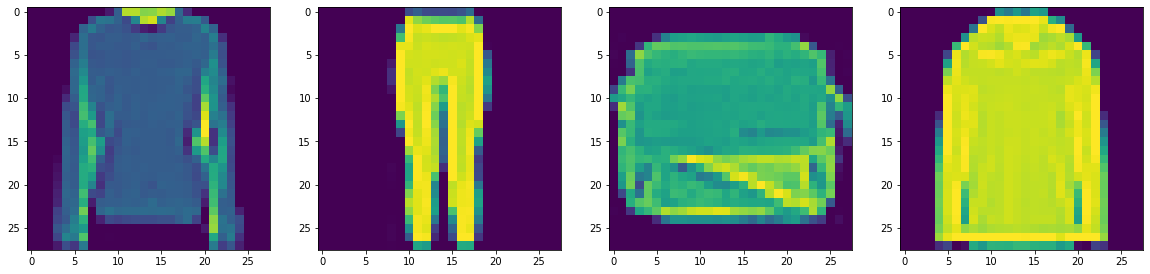

In [8]:
fig , ax = plt.subplots(ncols = 4 , figsize = (20,20))

for idx in range(4):
  #Grabbing our images and the respective labels
   sample = iterator.next()
   #Plotting images!
   ax[idx].imshow(np.squeeze(sample['image']))


In [9]:
#Scaling the images between 0 and 1.

def scale_images(data):
    image = data['image']
    return image/255

In [10]:
#Reloading our fashion dataset
ds = tfds.load('fashion_mnist', split = 'train')

#Running the datasetvia our scaling function to scale down the dtaa for faster processing
ds = ds.map(scale_images)

#Cache the dataset
ds= ds.cache()

#Shuffling the dataset
ds = ds.shuffle(60000)

#Batching the images in sizes of 128
ds= ds.batch(128)

#Preventing bottlenecking
ds = ds.prefetch(64)

In [11]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

Building The Neural Network Architecture!

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,Dense , Flatten , Reshape , LeakyReLU , Dropout , UpSampling2D

Building a generator!


In [13]:
def build_generator():
  model = Sequential()

 #Beginning of a a random generator
  model.add(Dense(7*7*128 , input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

 #Upsampling once 
  model.add(UpSampling2D())
  model.add(Conv2D(128,5 , padding = 'same'))
  model.add(LeakyReLU(0.2))

 #Upsampling twice
  model.add(UpSampling2D())
  model.add(Conv2D(128,5 , padding = 'same'))
  model.add(LeakyReLU(0.2))

  #Conv Layer 1
  model.add(Conv2D(128,5 , padding = 'same'))
  model.add(LeakyReLU(0.2))

  #Conv Layer 2
  model.add(Conv2D(128,5 , padding = 'same'))
  model.add(LeakyReLU(0.2))

  #Conv layer to get to one channel
  model.add(Conv2D(1, 4 , padding = 'same' , activation = 'sigmoid'))
  

  return model

In [14]:
generator = build_generator()

In [15]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

Building a discriminator!


In [16]:
def discriminator():
    model = Sequential()
    
    #First Conv Block
    model.add(Conv2D(32 , 5 , input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #Second Conv Block
    model.add(Conv2D(64 , 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #Third Conv Block
    model.add(Conv2D(128 , 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #Fourth Conv Block
    model.add(Conv2D(256 , 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #Final Touchups
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation = 'sigmoid'))

    model.add
    return model

In [17]:
discriminator().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

Constructing Training Loop!

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [19]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [20]:
#Importing base model class to subclass!
from tensorflow.keras.models import Model